In [209]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
online_retail = pd.read_csv('/kaggle/input/online-retail-sales-and-customer-data/online_retail.csv')

In [211]:
online_retail.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [212]:
online_retail.shape

(541909, 9)

In [213]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [214]:
#drop the rows with NaN values and store the version into newer variable
online_retail.dropna(inplace=True, axis=0)

#reset index
online_retail = online_retail.reset_index(drop=True)

In [215]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        406829 non-null  int64  
 1   InvoiceNo    406829 non-null  object 
 2   StockCode    406829 non-null  object 
 3   Description  406829 non-null  object 
 4   Quantity     406829 non-null  int64  
 5   InvoiceDate  406829 non-null  object 
 6   UnitPrice    406829 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      406829 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 27.9+ MB


In [216]:
online_retail.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [217]:
online_retail['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [218]:
online_retail.to_csv('online_retail.csv')

In [219]:
online_retail['Sales'] = online_retail['Quantity'] * online_retail['UnitPrice']

In [220]:
online_retail.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [222]:
top_sales_country = online_retail.groupby('Country')['Sales'].sum()

In [223]:
type(top_sales_country)

pandas.core.series.Series

In [224]:
top_sales_country = pd.DataFrame({'Country': top_sales_country.index, 'Totalsales': top_sales_country.values})

In [225]:
top_sales_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     37 non-null     object 
 1   Totalsales  37 non-null     float64
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [226]:
top_sales_country = top_sales_country.sort_values(by='Totalsales', ascending=False)

In [227]:
top_sales_country = top_sales_country.reset_index(drop=True)

In [228]:
top_sales_country.head()

,Country,Totalsales
0,United Kingdom,6767873.394
1,Netherlands,284661.540
2,EIRE,250285.220
3,Germany,221698.210
4,France,196712.840


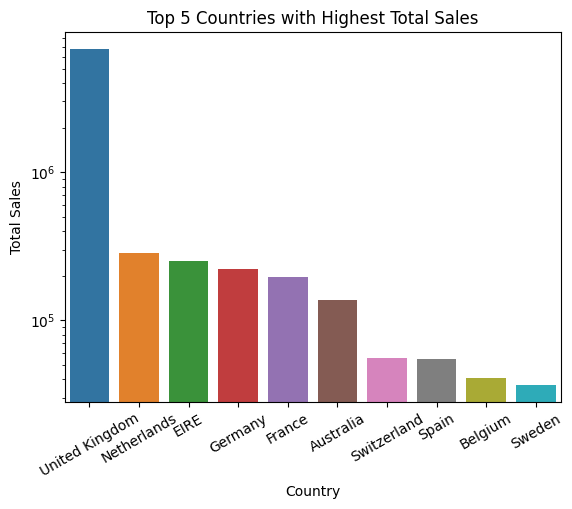

In [229]:
top_10_sales = top_sales_country.head(10)
sns.barplot(data= top_10_sales, x = 'Country', y = 'Totalsales', log=True)
plt.title("Top 5 Countries with Highest Total Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.show()

In [230]:
online_retail['InvoiceDate'] = pd.to_datetime(online_retail['InvoiceDate'], format='%m/%d/%Y %H:%M').dt.date

In [231]:
online_retail.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [232]:
top_sales_date = online_retail.groupby('InvoiceDate')['Sales'].sum()

In [233]:
top_sales_date = pd.DataFrame({'InvoiceDate': top_sales_date.index, 'Totalsales': top_sales_date.values})

Text(0, 0.5, 'Total Sales')

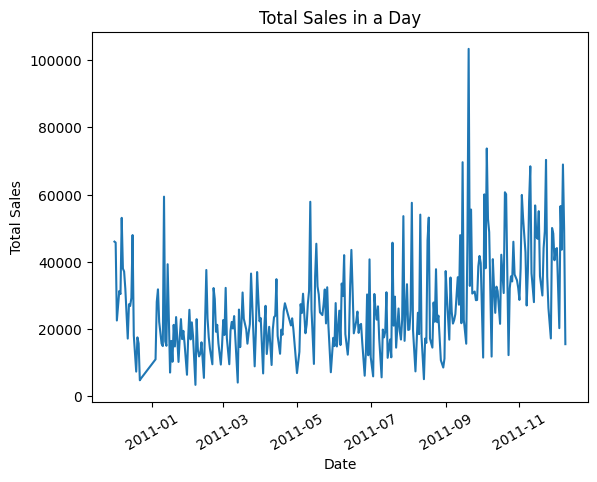

In [234]:
# Plotting the timeseries graph of given dataset
plt.plot(top_sales_date['InvoiceDate'], top_sales_date['Totalsales'])
 
# Giving title to the graph
plt.title('Total Sales in a Day')
 
# rotating the x-axis tick labels at 30degree 
# towards right
plt.xticks(rotation=30)
 
# Giving x and y label to the graph
plt.xlabel('Date')
plt.ylabel('Total Sales')